##### Lending Club Data Project

## 4 Model Evaluation: Application to Test Data

Now we evaluate the best model (logistic regression, 10 features) on our test data:
* The baseline model (Dummy Classifier)
* The logistic regression with 10 features
* The KNN with 10 features
* The Adaboost with logistic regression as base model
* The decision tree with 10 features
* the random forest with 10 features


__Content__ <br>
4.1 Data Import <br>
4.2 Predict the Test Data with our Models <br>
4.3 Conclusion <br>

### 4.1 Load Data

In [22]:
reset -fs

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
import statsmodels.formula.api as smf

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
import re 
import math

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, mutual_info_classif
pd.set_option('display.max_columns', None)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, confusion_matrix, fbeta_score

In [24]:
X_test = pd.read_csv('data/x_test_10.csv')
X_test.drop('Unnamed: 0', inplace = True, axis = 1)
y_test = pd.read_csv('data/y_test.csv')
y_test.drop('Unnamed: 0', inplace = True, axis = 1)

In [25]:
X_train = pd.read_csv('data/X_smo_10.csv')
y_train = pd.read_csv('data/y_smo.csv')

In [26]:
X_train.drop('Unnamed: 0', inplace = True, axis = 1)
y_train.drop('Unnamed: 0', inplace = True, axis = 1)

In [27]:
y_train = y_train.rename(columns = {"0": 'loan_status'})

### 4.2 Predict the Test Data with Our Models

#### 4.2. Dummy Classifier (Base Model)

F beta Score for both classes:
0.75


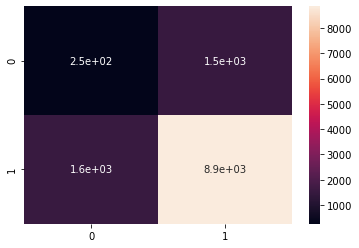

In [54]:
from sklearn.dummy import DummyClassifier
#Define the Classifier and fit it to the train data
dummy_clf = DummyClassifier(random_state = 2, strategy = 'stratified')
dummy_clf.fit(X_train, y_train)
cv_results = cross_validate(dummy_clf, X_train, y_train, cv=5, return_estimator = True)


#Make predictions using cross-validation
y_pred = cross_val_predict(dummy_clf, X_test, y_test, cv = 5)

# Printing evaluation scores for the Dummy Classifier 
print('F beta Score for both classes:')
print(fbeta_score(y_test, y_pred, beta = .2, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

#### 4.2.2 Logistic Regression Model

In [55]:
from sklearn.linear_model import LogisticRegression
best_log_10 = LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, l1_ratio=0, max_iter=7639,
                   n_jobs=-1, penalty='elasticnet', random_state=0,
                   solver='saga')
best_log_10.fit(X_train, np.array(y_train).ravel())
y_pred = best_log_10.predict(X_test)

F beta Score for both classes:
0.81


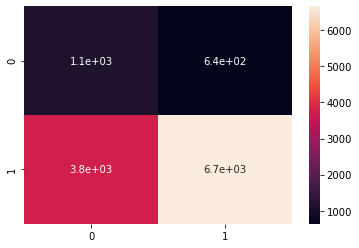

In [56]:
print('F beta Score for both classes:')
print(fbeta_score(y_test, y_pred, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.23      0.64      0.34      1761
         1.0       0.91      0.64      0.75     10425

    accuracy                           0.64     12186
   macro avg       0.57      0.64      0.55     12186
weighted avg       0.81      0.64      0.69     12186



The model generalizes well, the evaluation metric is as good as for the training data.

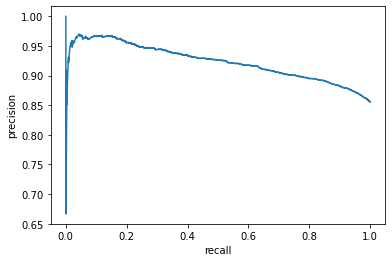

In [58]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, best_log_10.predict_proba(X_test)[:,1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

#### 4.2.3 Decision Tree

F beta Score for both classes:
0.81


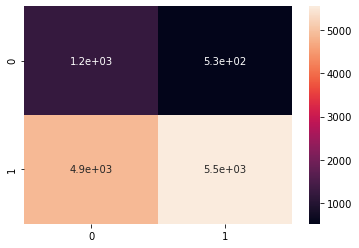

In [60]:
from sklearn.tree import DecisionTreeClassifier
best_dt_model_10 = DecisionTreeClassifier(min_samples_split= 190, max_depth= 5, criterion ='entropy', class_weight = {0: 0.6, 1: 0.4})
best_dt_model_10.fit(X_train, y_train)
y_pred2 = best_dt_model_10.predict(X_test)
print('F beta Score for both classes:')
print(fbeta_score(y_test, y_pred2, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True);

In [62]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.20      0.70      0.31      1761
         1.0       0.91      0.53      0.67     10425

    accuracy                           0.56     12186
   macro avg       0.56      0.62      0.49     12186
weighted avg       0.81      0.56      0.62     12186



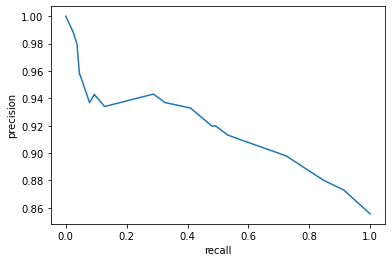

In [73]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, best_dt_model_10.predict_proba(X_test)[:,1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

The model is as good as the logistic regression.

#### 4.2.4 Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
best_rf_model_10 = RandomForestClassifier(n_jobs = -1, random_state = 8, verbose = 5, bootstrap = True, n_estimators= 588,
                                          min_samples_split= 250, max_depth = 10, criterion = 'gini', class_weight= {0: 0.6, 1: 0.4})
best_rf_model_10.fit(X_train, np.array(y_train).ravel())
y_pred3 = best_rf_model_10.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 588building tree 2 of 588building tree 3 of 588building tree 4 of 588



building tree 5 of 588building tree 6 of 588

building tree 7 of 588
building tree 8 of 588
building tree 9 of 588
building tree 10 of 588
building tree 11 of 588
building tree 12 of 588
building tree 13 of 588
building tree 14 of 588
building tree 15 of 588
building tree 16 of 588
building tree 17 of 588
building tree 18 of 588
building tree 19 of 588
building tree 20 of 588
building tree 21 of 588
building tree 22 of 588
building tree 23 of 588
building tree 24 of 588
building tree 25 of 588
building tree 26 of 588
building tree 27 of 588
building tree 28 of 588
building tree 29 of 588
building tree 30 of 588
building tree 31 of 588
building tree 32 of 588
building tree 33 of 588
building tree 34 of 588
building tree 35 of 588
building tree 36 of 588
building tree 37 of 588
building tree 38 of 588
building tree 39 of 588
building tree 40 of 588
building tree 41 of 588
building tree 42 of 588
b

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.1s


building tree 72 of 588
building tree 73 of 588
building tree 74 of 588
building tree 75 of 588
building tree 76 of 588
building tree 77 of 588
building tree 78 of 588
building tree 79 of 588
building tree 80 of 588
building tree 81 of 588
building tree 82 of 588
building tree 83 of 588
building tree 84 of 588
building tree 85 of 588
building tree 86 of 588
building tree 87 of 588
building tree 88 of 588
building tree 89 of 588
building tree 90 of 588
building tree 91 of 588
building tree 92 of 588
building tree 93 of 588
building tree 94 of 588
building tree 95 of 588
building tree 96 of 588
building tree 97 of 588
building tree 98 of 588
building tree 99 of 588
building tree 100 of 588
building tree 101 of 588
building tree 102 of 588
building tree 103 of 588
building tree 104 of 588building tree 105 of 588

building tree 106 of 588
building tree 107 of 588
building tree 108 of 588
building tree 109 of 588
building tree 110 of 588
building tree 111 of 588
building tree 112 of 588
bui

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.5s


building tree 160 of 588
building tree 161 of 588
building tree 162 of 588
building tree 163 of 588
building tree 164 of 588
building tree 165 of 588
building tree 166 of 588
building tree 167 of 588
building tree 168 of 588
building tree 169 of 588
building tree 170 of 588
building tree 171 of 588
building tree 172 of 588
building tree 173 of 588
building tree 174 of 588
building tree 175 of 588
building tree 176 of 588
building tree 177 of 588
building tree 178 of 588
building tree 179 of 588
building tree 180 of 588
building tree 181 of 588building tree 182 of 588

building tree 183 of 588
building tree 184 of 588
building tree 185 of 588
building tree 186 of 588
building tree 187 of 588
building tree 188 of 588
building tree 189 of 588
building tree 190 of 588
building tree 191 of 588
building tree 192 of 588building tree 193 of 588

building tree 194 of 588
building tree 195 of 588
building tree 196 of 588
building tree 197 of 588
building tree 198 of 588
building tree 199 of 588


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.6s


building tree 285 of 588
building tree 286 of 588
building tree 287 of 588
building tree 288 of 588
building tree 289 of 588
building tree 290 of 588
building tree 291 of 588
building tree 292 of 588
building tree 293 of 588
building tree 294 of 588
building tree 295 of 588
building tree 296 of 588
building tree 297 of 588
building tree 298 of 588
building tree 299 of 588
building tree 300 of 588
building tree 301 of 588
building tree 302 of 588
building tree 303 of 588
building tree 304 of 588
building tree 305 of 588
building tree 306 of 588
building tree 307 of 588
building tree 308 of 588
building tree 309 of 588
building tree 310 of 588
building tree 311 of 588
building tree 312 of 588
building tree 313 of 588
building tree 314 of 588
building tree 315 of 588
building tree 316 of 588
building tree 317 of 588
building tree 318 of 588
building tree 319 of 588
building tree 320 of 588
building tree 321 of 588
building tree 322 of 588
building tree 323 of 588
building tree 324 of 588


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    7.0s


building tree 454 of 588
building tree 455 of 588
building tree 456 of 588
building tree 457 of 588
building tree 458 of 588
building tree 459 of 588
building tree 460 of 588
building tree 461 of 588
building tree 462 of 588
building tree 463 of 588
building tree 464 of 588
building tree 465 of 588
building tree 466 of 588
building tree 467 of 588
building tree 468 of 588
building tree 469 of 588
building tree 470 of 588
building tree 471 of 588building tree 472 of 588

building tree 473 of 588
building tree 474 of 588
building tree 475 of 588
building tree 476 of 588
building tree 477 of 588
building tree 478 of 588
building tree 479 of 588
building tree 480 of 588building tree 481 of 588

building tree 482 of 588
building tree 483 of 588
building tree 484 of 588
building tree 485 of 588
building tree 486 of 588
building tree 487 of 588
building tree 488 of 588
building tree 489 of 588
building tree 490 of 588
building tree 491 of 588
building tree 492 of 588building tree 493 of 588



[Parallel(n_jobs=-1)]: Done 588 out of 588 | elapsed:    9.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 588 out of 588 | elapsed:    0.3s finished


In [49]:
fbeta_scorer = fbeta_score(y_test, y_pred3, beta=0.1, average = "weighted")
print(f"fbeta: ", fbeta_scorer.round(2))

fbeta:  0.81


In [63]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.23      0.64      0.33      1761
         1.0       0.91      0.63      0.74     10425

    accuracy                           0.63     12186
   macro avg       0.57      0.63      0.54     12186
weighted avg       0.81      0.63      0.68     12186



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 588 out of 588 | elapsed:    0.4s finished


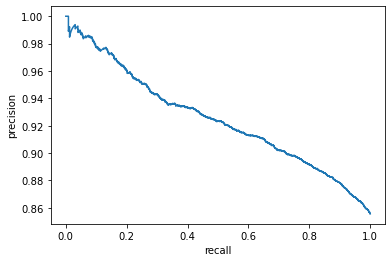

In [74]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, best_rf_model_10.predict_proba(X_test)[:,1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

The model is as good as the logistic regression and decision tree model. 

#### 4.2.4 KNN

In [53]:
best_knn_10 = KNeighborsClassifier(n_jobs = -1, n_neighbors = 50, metric = 'manhattan', weights = 'uniform')
best_knn_10.fit(X_train, np.array(y_train).ravel())
y_pred4 = best_knn_10.predict(X_test)

In [61]:
print('F beta Score for both classes:')
print(fbeta_score(y_test, y_pred4, beta = .1, average = 'weighted').round(2))

F beta Score for both classes:
0.8


In [64]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

         0.0       0.22      0.61      0.32      1761
         1.0       0.90      0.63      0.74     10425

    accuracy                           0.63     12186
   macro avg       0.56      0.62      0.53     12186
weighted avg       0.81      0.63      0.68     12186



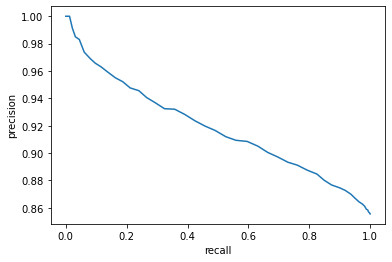

In [75]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, best_knn_10.predict_proba(X_test)[:,1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

The model is good but not as good as the other ones. 

#### 4.2.4 AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier
best_boost = AdaBoostClassifier(base_estimator=best_log_10, n_estimators = 146, learning_rate = 0.1) 
best_boost.fit(X_train, np.array(y_train).ravel())
y_pred5 = best_boost.predict(X_test)

In [71]:
print('F beta Score for both classes:')
print(fbeta_score(y_test, y_pred5, beta = .1, average = 'weighted').round(2))

F beta Score for both classes:
0.81


In [72]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.21      0.66      0.32      1761
         1.0       0.91      0.59      0.72     10425

    accuracy                           0.60     12186
   macro avg       0.56      0.63      0.52     12186
weighted avg       0.81      0.60      0.66     12186



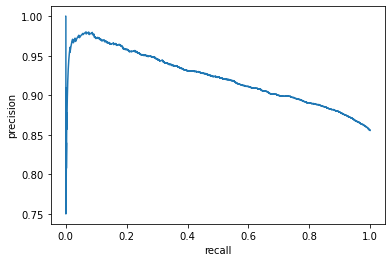

In [76]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, best_boost.predict_proba(X_test)[:,1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

AdaBoost performs also very well.

### 4.3 Conclusion

All models perform comparably well on the training data. Since the logistic regression model gives the best results considering both F beta score and other measures of the confusion matrix (recall, accuracy), we go for this final model: 
 * a logistic regression model with a F beta score of .81 (with great weight on precision with beta = .1). The model parameters are:
   * C = 0.1
   * class weight = {0: 0.5, 1: 0.5}
   * l1_ratio = 0, i.e., l2-regularization (Ridge)
   * maximum number of iterations: 7639
 
The best predictors to lean the decision for or against a borrower on are:
 * the funded amount
 * interest rate
 * borrower's grade
 * borrower's annual income
 * dept/ income ratio
 * the monthly payment owed by the borrower if the loan originates
 * the number of inquiries in past 6 months
 * the number of open credit lines in the borrower's credit file
 * the revolving line utilization rate
 * the total number of credit lines currently in the borrower's credit file 

The model is good but since investors need to minimize their risk, the model needs further optimization. For instance, the possibilities of ensemble methods haven't been used exhaustively. Also, we could try a support vector machine model with a reduced dataset (since SVMs can't handle large datasets well). 
Additionally, feature selection is not ideal: intercorrelations between predictors are partly very high. This is acceptable, though, since we're not interested in the predictors' individual variance explanation but in a preferably good predicition of credit service.
